In [4]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [5]:
nltk.download('stopwords')

NameError: name 'nltk' is not defined

In [6]:
nltk.download('wordnet')

NameError: name 'nltk' is not defined

In [7]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [8]:
import re
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import keras
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import math
import nltk
import csv
import seaborn as sns
import matplotlib.pyplot  as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


2023-10-18 09:19:23.824199: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-18 09:19:23.999133: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-18 09:19:24.631581: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [9]:
import numpy as np
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

In [10]:
### step 1: load and visualize

In [11]:
df_train = pd.read_csv('/home/mca/Downloads/imdb/Train.csv')
df_train.head

<bound method NDFrame.head of                                                     text  label
0      I grew up (b. 1965) watching and loving the Th...      0
1      When I put this movie in my DVD player, and sa...      0
2      Why do people who do not know what a particula...      0
3      Even though I have great interest in Biblical ...      0
4      Im a die hard Dads Army fan and nothing will e...      1
...                                                  ...    ...
39995  "Western Union" is something of a forgotten cl...      1
39996  This movie is an incredible piece of work. It ...      1
39997  My wife and I watched this movie because we pl...      0
39998  When I first watched Flatliners, I was amazed....      1
39999  Why would this film be so good, but only gross...      1

[40000 rows x 2 columns]>

In [12]:
df_val = pd.read_csv('/home/mca/Downloads/imdb/Valid.csv')
df_val.head

<bound method NDFrame.head of                                                    text  label
0     It's been about 14 years since Sharon Stone aw...      0
1     someone needed to make a car payment... this i...      0
2     The Guidelines state that a comment must conta...      0
3     This movie is a muddled mish-mash of clichés f...      0
4     Before Stan Laurel became the smaller half of ...      0
...                                                 ...    ...
4995  Man, I loved this movie! This really takes me ...      1
4996  Recovery is an incredibly moving piece of work...      1
4997  You can take the crook out of the joint, but i...      1
4998  FUTZ is the only show preserved from the exper...      1
4999  "The Mother" tells of a recently widowed mid-6...      1

[5000 rows x 2 columns]>

In [13]:
df_test = pd.read_csv('/home/mca/Downloads/imdb/Test.csv')
df_test.head

<bound method NDFrame.head of                                                    text  label
0     I always wrote this series off as being a comp...      0
1     1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...      0
2     This movie was so poorly written and directed ...      0
3     The most interesting thing about Miryang (Secr...      1
4     when i first read about "berlin am meer" i did...      0
...                                                 ...    ...
4995  This is the kind of picture John Lassiter woul...      1
4996  A MUST SEE! I saw WHIPPED at a press screening...      1
4997  NBC should be ashamed. I wouldn't allow my chi...      0
4998  This movie is a clumsy mishmash of various gho...      0
4999  Formula movie about the illegitimate son of a ...      0

[5000 rows x 2 columns]>

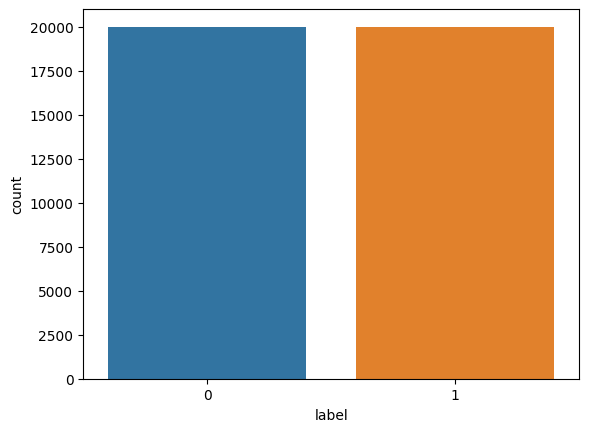

In [14]:
sns.countplot(x=df_train['label'])
plt.show()

In [15]:
### step  2: data preprocesing

In [16]:
# Step 2: Data Processing - Convert to Lowercase
df_train['text'] = df_train['text'].str.lower()
df_val['text'] = df_train['text'].str.lower()
df_test['text'] = df_train['text'].str.lower()

In [17]:
# Step 3: Data Processing - Remove Punctuation
import string
df_train['text'] = df_train['text'].apply(lambda x: ''.join([char for char in x if char not in string.punctuation]))
df_val['text'] = df_train['text'].apply(lambda x: ''.join([char for char in x if char not in string.punctuation]))
df_test['text'] = df_train['text'].apply(lambda x: ''.join([char for char in x if char not in string.punctuation]))

In [18]:
# Step 3: Data Processing - alphaneumeric
df_train['text'] = df_train['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))
df_val['text'] = df_train['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))
df_test['text'] = df_train['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

In [19]:
# Step 3: Data Processing - Remove stop words
stop_words = set(stopwords.words('english'))
df_train['text'] = df_train['text'].apply(lambda text: ' '.join([word for word in text.split() if word not in stop_words]))
df_val['text'] = df_val['text'].apply(lambda text: ' '.join([word for word in text.split() if word not in stop_words]))
df_test['text'] = df_test['text'].apply(lambda text: ' '.join([word for word in text.split() if word not in stop_words]))


In [20]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
df_train['text'] = df_train['text'].apply(lambda text: ' '.join([lemmatizer.lemmatize(word) for word in text.split()]))
df_val['text'] = df_val['text'].apply(lambda text: ' '.join([lemmatizer.lemmatize(word) for word in text.split()]))
df_test['text'] = df_test['text'].apply(lambda text: ' '.join([lemmatizer.lemmatize(word) for word in text.split()]))

In [21]:
# Step 4: Data Processing - Create a List of Reviews
reviews_train = df_train['text'].tolist()
labels_train = df_train['label'].tolist()  # Assuming 'label' is the column containing sentiment labels (e.g., 0 for negative, 1 for positive)

reviews_val = df_val['text'].tolist()
labels_val = df_val['label'].tolist()

reviews_test = df_test['text'].tolist()
labels_test = df_test['label'].tolist()

In [22]:
### step  3: tokenize

In [23]:
#  Tokenize - Create Vocab to Int Mapping Dictionary
max_words = 10000  # Define the maximum number of words in your vocabulary
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")#out-of-vocabulary (OOV) tokens
tokenizer.fit_on_texts(reviews_train)
tokenizer.fit_on_texts(reviews_val)
tokenizer.fit_on_texts(reviews_test)
vocab_size = len(tokenizer.word_index) + 1  # Vocabulary size(number of unique words)


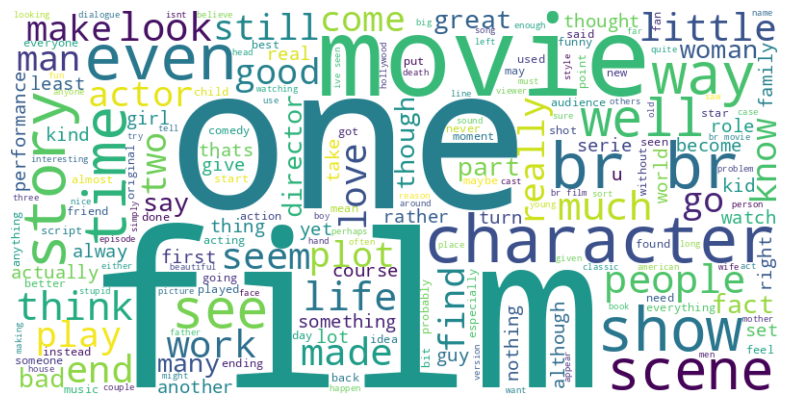

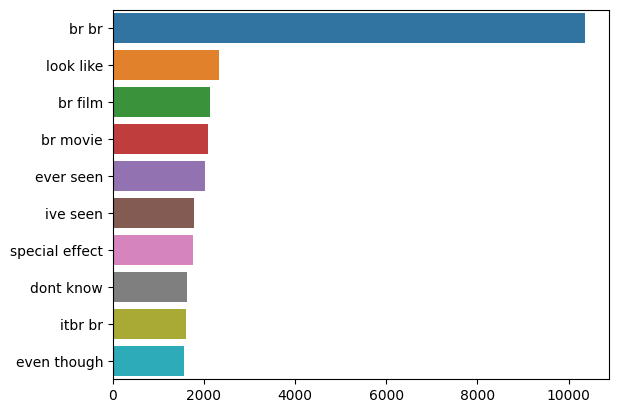

In [25]:
from wordcloud import WordCloud
from nltk.util import ngrams

from sklearn.feature_extraction.text import CountVectorizer

# Visualize the most frequent words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_train['text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Visualize the most frequent bigrams
def get_top_n_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), max_features=2000).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

top_bigrams = get_top_n_bigrams(df_train['text'], n=10)
x, y = map(list, zip(*top_bigrams))
sns.barplot(x=y, y=x)
plt.show()


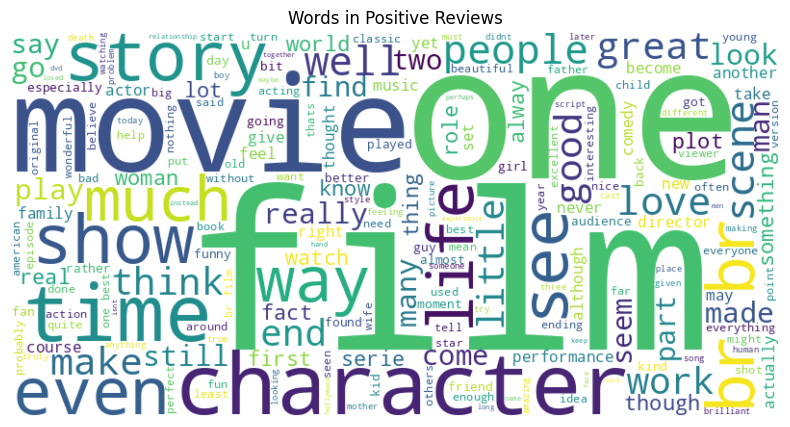

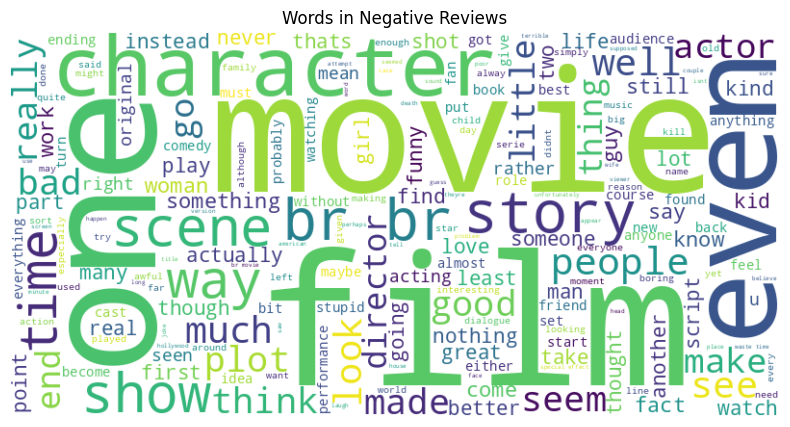

In [26]:
# Separate positive and negative reviews
positive_reviews = df_train[df_train['label'] == 1] ['text']
negative_reviews = df_train[df_train['label'] == 0 ]['text']

# Visualize practical words for positive reviews
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_reviews))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.title("Words in Positive Reviews")
plt.show()

# Visualize practical words for negative reviews
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negative_reviews))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.title("Words in Negative Reviews")
plt.show()


In [27]:
vocab_size

148912

In [28]:
len(reviews_train)

40000

In [29]:
### step  4: encode the words and labels

In [30]:
# Tokenize - Encode the Words
sequences_train = tokenizer.texts_to_sequences(reviews_train)
sequences_val = tokenizer.texts_to_sequences(reviews_val)
sequences_test = tokenizer.texts_to_sequences(reviews_test)
#sequences
#  Tokenize - Encode the Labels
#labels = np.array(labels)
#labels= pd.get_dummies(df['sentiment']).values
labels_train= pd.get_dummies(df_train['label']).values
#labels

In [31]:
### step  5: analyse reviews length

In [32]:
#  Analyze Reviews Length
review_len_train = [len(seq) for seq in sequences_train]
review_len_val = [len(seq) for seq in sequences_val]
review_len_test = [len(seq) for seq in sequences_test]
print(review_len_train)
#  Removing Outliers - Getting rid of extremely long or short reviews
max_review_length = 200  # Define your desired maximum review length
sequences_train = pad_sequences(sequences_train, maxlen=max_review_length, padding='post', truncating='post')
sequences_val = pad_sequences(sequences_val, maxlen=max_review_length, padding='post', truncating='post')
sequences_test = pad_sequences(sequences_test, maxlen=max_review_length, padding='post', truncating='post')

[87, 157, 99, 33, 107, 57, 123, 149, 110, 143, 65, 134, 42, 76, 73, 80, 545, 131, 219, 139, 49, 66, 16, 143, 65, 251, 91, 21, 70, 146, 99, 89, 145, 100, 156, 104, 167, 345, 50, 493, 68, 110, 80, 125, 94, 89, 219, 23, 80, 60, 84, 77, 28, 190, 75, 134, 87, 82, 69, 196, 28, 264, 72, 67, 79, 55, 146, 456, 136, 75, 80, 57, 153, 78, 62, 287, 152, 90, 288, 215, 69, 63, 111, 119, 32, 114, 206, 88, 202, 103, 109, 122, 53, 177, 85, 62, 98, 199, 80, 183, 76, 368, 112, 57, 83, 68, 499, 268, 44, 41, 218, 107, 71, 42, 355, 130, 99, 307, 335, 203, 176, 107, 71, 116, 75, 209, 54, 75, 90, 196, 86, 113, 54, 91, 52, 142, 309, 67, 133, 159, 97, 38, 52, 64, 64, 37, 117, 60, 331, 68, 72, 29, 206, 67, 99, 267, 119, 214, 123, 167, 52, 105, 25, 119, 143, 149, 96, 150, 182, 63, 63, 70, 67, 67, 176, 100, 180, 188, 72, 132, 293, 108, 125, 132, 225, 140, 83, 135, 261, 75, 247, 51, 72, 70, 86, 188, 72, 386, 354, 142, 62, 54, 68, 194, 103, 71, 198, 125, 189, 85, 100, 102, 346, 30, 185, 109, 87, 69, 73, 36, 172, 119,

In [33]:
### step  5: Define the LSTM Network Architecture

In [34]:
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_review_length))
model.add(LSTM(128, return_sequences=False))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))

2023-10-18 09:22:20.174477: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-18 09:22:20.287278: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-18 09:22:20.287732: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [35]:
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          1280000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                                 
Total params: 1419970 (5.42 MB)
Trainable params: 1419970 (5.42 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [36]:
batch_size = 32
model.fit(sequences_train,labels_train, epochs = 10, batch_size=batch_size, verbose = 2)

Epoch 1/10


2023-10-18 09:22:22.951702: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-10-18 09:22:23.065232: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-10-18 09:22:23.073416: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fe66fb0c1b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-18 09:22:23.073432: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2023-10-18 09:22:23.094748: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-10-18 09:22:23.279048: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the p

1250/1250 - 61s - loss: 0.6751 - accuracy: 0.5639 - 61s/epoch - 49ms/step
Epoch 2/10
1250/1250 - 25s - loss: 0.6603 - accuracy: 0.5847 - 25s/epoch - 20ms/step
Epoch 3/10
1250/1250 - 21s - loss: 0.6901 - accuracy: 0.5101 - 21s/epoch - 17ms/step
Epoch 4/10
1250/1250 - 19s - loss: 0.6883 - accuracy: 0.5104 - 19s/epoch - 15ms/step
Epoch 5/10
1250/1250 - 20s - loss: 0.6861 - accuracy: 0.5159 - 20s/epoch - 16ms/step
Epoch 6/10
1250/1250 - 22s - loss: 0.6908 - accuracy: 0.5042 - 22s/epoch - 18ms/step
Epoch 7/10
1250/1250 - 22s - loss: 0.6923 - accuracy: 0.4968 - 22s/epoch - 18ms/step
Epoch 8/10
1250/1250 - 21s - loss: 0.6862 - accuracy: 0.5155 - 21s/epoch - 17ms/step
Epoch 9/10
1250/1250 - 21s - loss: 0.5672 - accuracy: 0.6708 - 21s/epoch - 17ms/step
Epoch 10/10
1250/1250 - 22s - loss: 0.2889 - accuracy: 0.8904 - 22s/epoch - 18ms/step


In [37]:
labels_test= pd.get_dummies(df_test['label']).values

In [38]:
test_loss, test_accuracy = model.evaluate(sequences_test,labels_test)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

157/157 [==============================] - 2s 9ms/step - loss: 1.7416 - accuracy: 0.4978
Test Loss: 1.7416, Test Accuracy: 0.4978


In [39]:
# Example of making predictions on user-generated data:
user_reviews = ["I didn't like it at all."]
user_sequences = tokenizer.texts_to_sequences(user_reviews)
user_sequences = pad_sequences(user_sequences, maxlen=max_review_length, padding='post', truncating='post')
user_predictions = model.predict(user_sequences)
if (np.argmax(user_predictions) >= 0.5):
    print("Positive sentiment")
else:
    print("Negative sentiment")

1/1 [==============================] - 0s 195ms/step
Positive sentiment


In [40]:
# 5. Create an embedding layer and build a 15 layer LSTM/GRU and a 20 layer BidRNN for predicting the sentiment.

In [65]:
# Model 1: LSTM
model1 = Sequential()
model1.add(Embedding(input_dim=10000, output_dim=128, input_length=max_review_length))
model1.add(LSTM(128, return_sequences=True))
model1.add(LSTM(128, return_sequences=True))
model1.add(LSTM(128, return_sequences=True))
model1.add(LSTM(128, return_sequences=True))
model1.add(LSTM(128, return_sequences=True))
model1.add(LSTM(128, return_sequences=True))
model1.add(LSTM(128, return_sequences=True))
model1.add(LSTM(128, return_sequences=True))
model1.add(LSTM(128, return_sequences=True))
model1.add(LSTM(128, return_sequences=True))
model1.add(LSTM(128, return_sequences=True))
model1.add(LSTM(128, return_sequences=True))
model1.add(LSTM(128, return_sequences=False))

model1.add(Dense(64, activation='relu'))
model1.add(Dense(2, activation='sigmoid'))
model1.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model1.summary())


Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_17 (Embedding)    (None, 200, 128)          1280000   
                                                                 
 lstm_26 (LSTM)              (None, 200, 128)          131584    
                                                                 
 lstm_27 (LSTM)              (None, 200, 128)          131584    
                                                                 
 lstm_28 (LSTM)              (None, 200, 128)          131584    
                                                                 
 lstm_29 (LSTM)              (None, 200, 128)          131584    
                                                                 
 lstm_30 (LSTM)              (None, 200, 128)          131584    
                                                                 
 lstm_31 (LSTM)              (None, 200, 128)        

In [66]:
# Training the Models
 
batch_size = 32
history1 =model1.fit(sequences_train,labels_train, epochs = 10, batch_size=batch_size, verbose = 2)


Epoch 1/10
1250/1250 - 180s - loss: 0.6935 - accuracy: 0.4956 - 180s/epoch - 144ms/step
Epoch 2/10
1250/1250 - 155s - loss: 0.6932 - accuracy: 0.4989 - 155s/epoch - 124ms/step
Epoch 3/10
1250/1250 - 151s - loss: 0.6932 - accuracy: 0.5010 - 151s/epoch - 120ms/step
Epoch 4/10
1250/1250 - 150s - loss: 0.6932 - accuracy: 0.4943 - 150s/epoch - 120ms/step
Epoch 5/10
1250/1250 - 150s - loss: 0.6932 - accuracy: 0.4993 - 150s/epoch - 120ms/step
Epoch 6/10
1250/1250 - 152s - loss: 0.6932 - accuracy: 0.5022 - 152s/epoch - 121ms/step
Epoch 7/10
1250/1250 - 147s - loss: 0.6932 - accuracy: 0.5020 - 147s/epoch - 118ms/step
Epoch 8/10
1250/1250 - 150s - loss: 0.6932 - accuracy: 0.5003 - 150s/epoch - 120ms/step
Epoch 9/10
1250/1250 - 153s - loss: 0.6932 - accuracy: 0.4957 - 153s/epoch - 122ms/step
Epoch 10/10
1250/1250 - 152s - loss: 0.6932 - accuracy: 0.4997 - 152s/epoch - 122ms/step


In [67]:
labels_test= pd.get_dummies(df_test['label']).values

In [68]:
test_loss, test_accuracy = model1.evaluate(sequences_test,labels_test)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

157/157 [==============================] - 9s 43ms/step - loss: 0.6931 - accuracy: 0.5010
Test Loss: 0.6931, Test Accuracy: 0.5010


In [49]:
from keras.layers import GRU,Bidirectional

In [55]:
# Model 2: GRU
model2 = Sequential()
model2.add(Embedding(input_dim=10000, output_dim=128, input_length=max_review_length))
model2.add(GRU(64, return_sequences=True)) # GRU layer
model2.add(GRU(64, return_sequences=True))  # GRU layer
model2.add(GRU(64, return_sequences=True))  # GRU layer
model2.add(GRU(64, return_sequences=True))  # GRU layer
model2.add(GRU(64, return_sequences=True))  # GRU layer
model2.add(GRU(64, return_sequences=True))  # GRU layer
model2.add(GRU(64, return_sequences=True))  # GRU layer
model2.add(GRU(64, return_sequences=True))  # GRU layer
model2.add(GRU(64, return_sequences=True))  # GRU layer
model2.add(GRU(64, return_sequences=True))  # GRU layer
model2.add(GRU(64, return_sequences=True))  # GRU layer
model2.add(GRU(64, return_sequences=True))  # GRU layer
model2.add(GRU(64, return_sequences=True))  # GRU layer
model2.add(GRU(64))  # GRU layer
model2.add(Dense(2, activation='sigmoid'))
model2.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model1.summary())


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 200, 128)          1280000   
                                                                 
Total params: 1280000 (4.88 MB)
Trainable params: 1280000 (4.88 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [56]:
batch_size = 32
history2 =model2.fit(sequences_train,labels_train, epochs = 10, batch_size=batch_size, verbose = 2)

Epoch 1/10
1250/1250 - 156s - loss: 0.6933 - accuracy: 0.4990 - 156s/epoch - 125ms/step
Epoch 2/10
1250/1250 - 135s - loss: 0.6932 - accuracy: 0.4962 - 135s/epoch - 108ms/step
Epoch 3/10
1250/1250 - 134s - loss: 0.6932 - accuracy: 0.4954 - 134s/epoch - 108ms/step
Epoch 4/10
1250/1250 - 134s - loss: 0.6933 - accuracy: 0.5017 - 134s/epoch - 107ms/step
Epoch 5/10
1250/1250 - 134s - loss: 0.6915 - accuracy: 0.5239 - 134s/epoch - 107ms/step
Epoch 6/10
1250/1250 - 131s - loss: 0.6901 - accuracy: 0.5336 - 131s/epoch - 105ms/step
Epoch 7/10
1250/1250 - 135s - loss: 0.6894 - accuracy: 0.5324 - 135s/epoch - 108ms/step
Epoch 8/10
1250/1250 - 129s - loss: 0.6932 - accuracy: 0.4997 - 129s/epoch - 103ms/step
Epoch 9/10
1250/1250 - 133s - loss: 0.6932 - accuracy: 0.5006 - 133s/epoch - 106ms/step
Epoch 10/10
1250/1250 - 131s - loss: 0.6933 - accuracy: 0.4962 - 131s/epoch - 105ms/step


In [59]:
test_loss, test_accuracy = model2.evaluate(sequences_test,labels_test)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

157/157 [==============================] - 8s 36ms/step - loss: 0.6933 - accuracy: 0.4990
Test Loss: 0.6933, Test Accuracy: 0.4990


In [69]:
from keras.layers import SimpleRNN

In [71]:
# Model 3: bidirectional
model3 = Sequential()
model3.add(Embedding(input_dim=10000, output_dim=128, input_length=max_review_length))
model3.add(Bidirectional(SimpleRNN(64, return_sequences=True)))  # Bidirectional LSTM layer
model3.add(Bidirectional(LSTM(64,return_sequences=True))) 
model3.add(Bidirectional(LSTM(64,return_sequences=True)))
model3.add(Bidirectional(LSTM(64,return_sequences=True)))
model3.add(Bidirectional(LSTM(64,return_sequences=True)))
model3.add(Bidirectional(LSTM(64,return_sequences=True)))
model3.add(Bidirectional(LSTM(64,return_sequences=True)))
model3.add(Bidirectional(LSTM(64,return_sequences=True)))
model3.add(Bidirectional(LSTM(64,return_sequences=True)))
model3.add(Bidirectional(LSTM(64)))# Bidirectional LSTM layer
model3.add(Dense(2, activation='sigmoid'))
model3.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model3.summary())

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_19 (Embedding)    (None, 200, 128)          1280000   
                                                                 
 bidirectional_6 (Bidirecti  (None, 200, 128)          24704     
 onal)                                                           
                                                                 
 bidirectional_7 (Bidirecti  (None, 200, 128)          98816     
 onal)                                                           
                                                                 
 bidirectional_8 (Bidirecti  (None, 200, 128)          98816     
 onal)                                                           
                                                                 
 bidirectional_9 (Bidirecti  (None, 200, 128)          98816     
 onal)                                               

In [72]:
batch_size = 32
history3 =model3.fit(sequences_train,labels_train, epochs = 10, batch_size=batch_size, verbose = 2)

Epoch 1/10
1250/1250 - 232s - loss: 0.6666 - accuracy: 0.6029 - 232s/epoch - 185ms/step
Epoch 2/10
1250/1250 - 194s - loss: 0.6622 - accuracy: 0.6119 - 194s/epoch - 156ms/step
Epoch 3/10
1250/1250 - 192s - loss: 0.6629 - accuracy: 0.6132 - 192s/epoch - 153ms/step
Epoch 4/10
1250/1250 - 192s - loss: 0.6810 - accuracy: 0.5698 - 192s/epoch - 153ms/step
Epoch 5/10
1250/1250 - 193s - loss: 0.6815 - accuracy: 0.5667 - 193s/epoch - 154ms/step
Epoch 6/10
1250/1250 - 193s - loss: 0.6811 - accuracy: 0.5683 - 193s/epoch - 154ms/step
Epoch 7/10
1250/1250 - 191s - loss: 0.6812 - accuracy: 0.5683 - 191s/epoch - 153ms/step
Epoch 8/10
1250/1250 - 190s - loss: 0.6813 - accuracy: 0.5683 - 190s/epoch - 152ms/step
Epoch 9/10
1250/1250 - 189s - loss: 0.6819 - accuracy: 0.5667 - 189s/epoch - 152ms/step
Epoch 10/10
1250/1250 - 189s - loss: 0.6818 - accuracy: 0.5665 - 189s/epoch - 151ms/step


In [73]:
labels_test= pd.get_dummies(df_test['label']).values

In [74]:
test_loss, test_accuracy = model3.evaluate(sequences_test,labels_test)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

157/157 [==============================] - 12s 61ms/step - loss: 0.7106 - accuracy: 0.5012
Test Loss: 0.7106, Test Accuracy: 0.5012


In [77]:
y_pred1=model1.predict(sequences_test)
y_pred2=model2.predict(sequences_test)

157/157 [==============================] - 7s 32ms/step


In [78]:
# Accuracy
print("Model 1 Accuracy: ", accuracy_score(labels_test, y_pred1))
print("Model 2 Accuracy: ", accuracy_score(labels_test, y_pred2))

ValueError: Classification metrics can't handle a mix of multilabel-indicator and continuous-multioutput targets